In [30]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
ph = gpd.read_file('data/gadm36_PHL_1.shp')
ph.head(3)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."


In [52]:
healthsites = gpd.read_file('data/philippines.geojson', driver='GeoJSON')
healthsites.head(50)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."
5,678983870,node,9.0,,clinic,,,,,4282186.0,...,arivac_bohol,,,,,,,None,None,POINT (123.98877 9.79335)
6,8076834059,node,28.0,,pharmacy,,Magsaysay,Edito Vitug,water_works,93459190.0,...,KristeleH,,,,,pharmacy,private,None,None,POINT (120.56550 14.91256)
7,836665474,way,6.0,,hospital,,,,,89330707.0,...,TagaSanPedroAko,,,,,,,None,None,"POLYGON ((123.52054 13.60460, 123.52061 13.604..."
8,3940989272,node,9.0,,dentist,,,,,36520157.0,...,Albayano,,,,,,,None,None,POINT (123.74586 13.13973)
9,1018210574,node,21.0,,pharmacy,,Marcelo H. del Pilar Avenue,,,96334310.0,...,ianlopez1115,,,,,pharmacy,,None,None,POINT (121.24557 14.06309)


(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

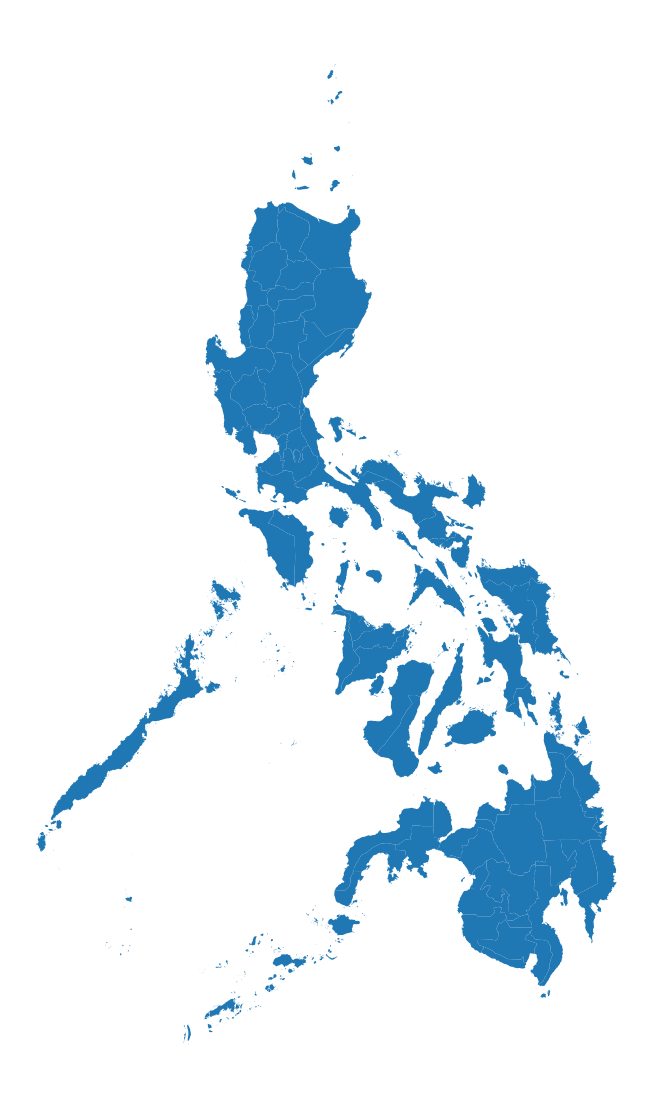

In [4]:
ph.plot(figsize=(30,20)).axis("off")

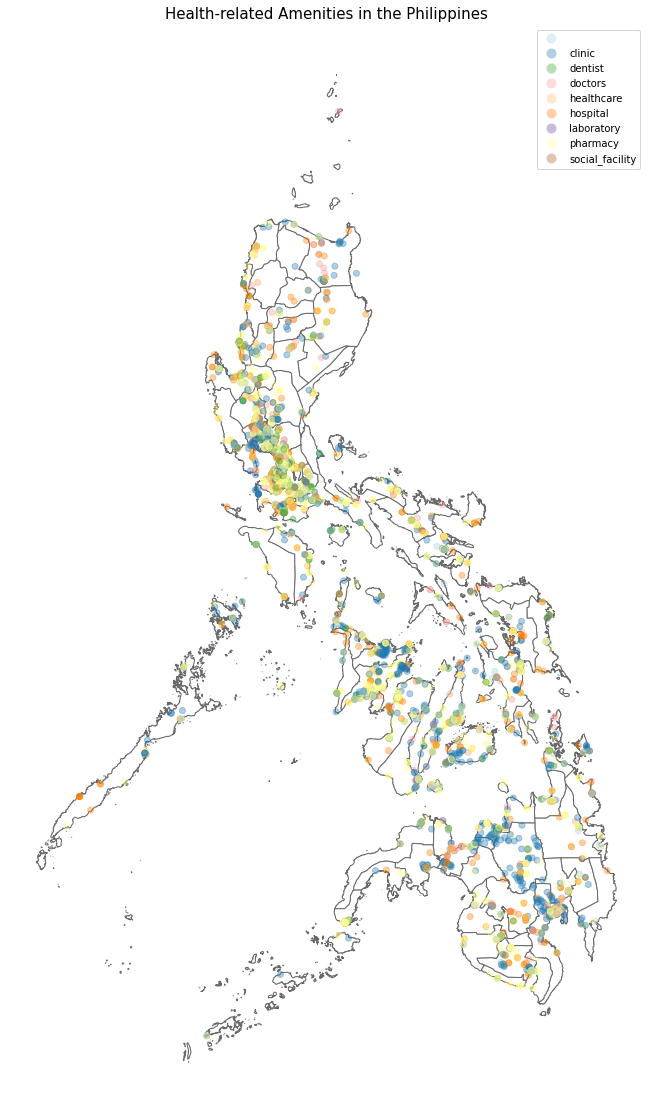

In [10]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [34]:
bulacan = ph[ph.NAME_1=="Bulacan"]
bulacan_amenities = gpd.sjoin(healthsites, bulacan, op='within')
bulacan_stations.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
10,164577919,way,9.0,,hospital,,,,,11669251.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU
58,397040242,way,21.0,,hospital,,Do単a Remedios Trinidad Highway,,,50131022.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU
139,3048350555,node,9.0,,pharmacy,,,,,25086604.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU
171,3056949510,node,9.0,,hospital,,,,,25198549.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU
194,2573040752,node,9.0,,pharmacy,,,,,19359776.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU


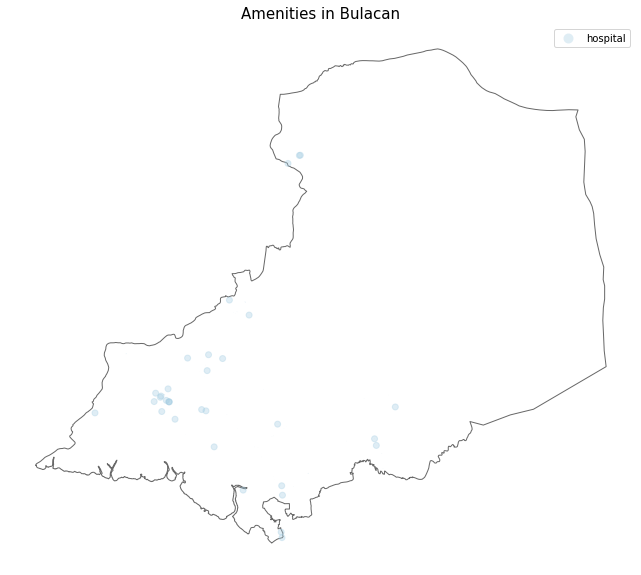

In [79]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bl = bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenities.loc[bulacan_amenities["amenity"]=="hospital"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Bulacan', fontsize=15)
ax.axis('off');

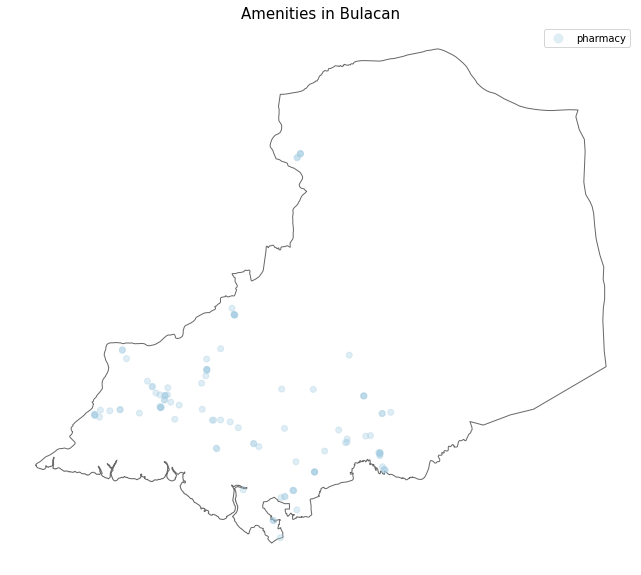

In [80]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenities.loc[bulacan_amenities["amenity"]=="pharmacy"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Bulacan', fontsize=15)
ax.axis('off');

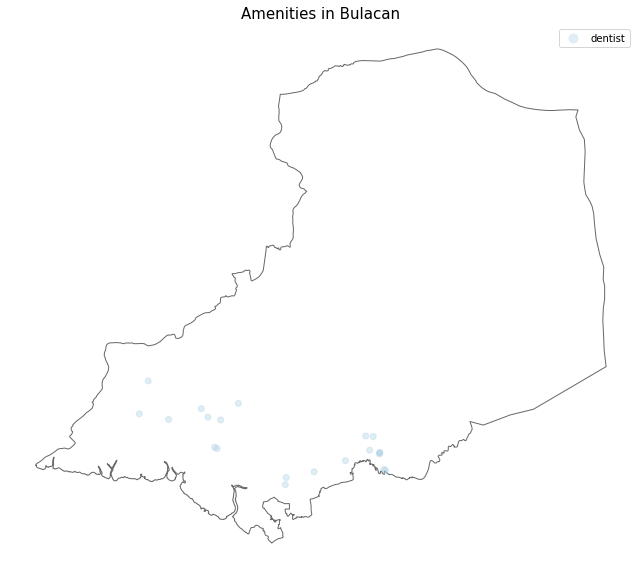

In [71]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenities.loc[bulacan_amenities["amenity"]=="dentist"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Bulacan', fontsize=15)
ax.axis('off');

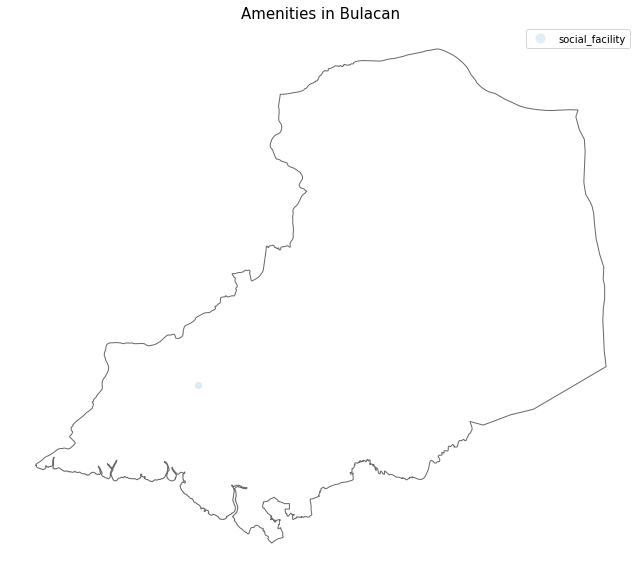

In [72]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenities.loc[bulacan_amenities["amenity"]=="social_facility"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Bulacan', fontsize=15)
ax.axis('off');

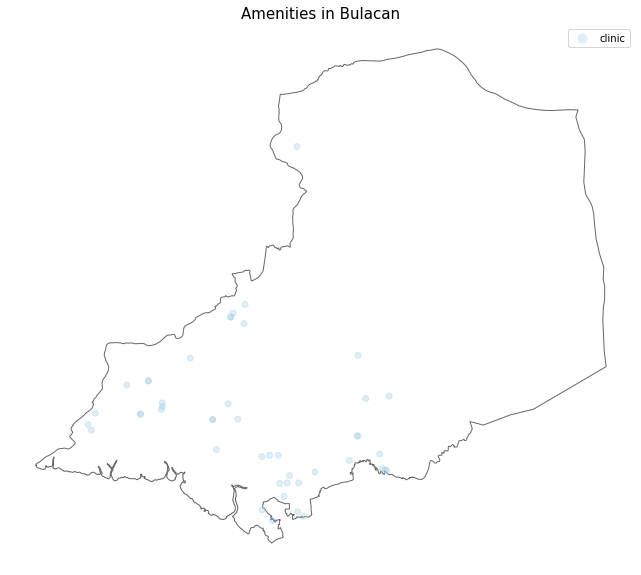

In [73]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenities.loc[bulacan_amenities["amenity"]=="clinic"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Bulacan', fontsize=15)
ax.axis('off');

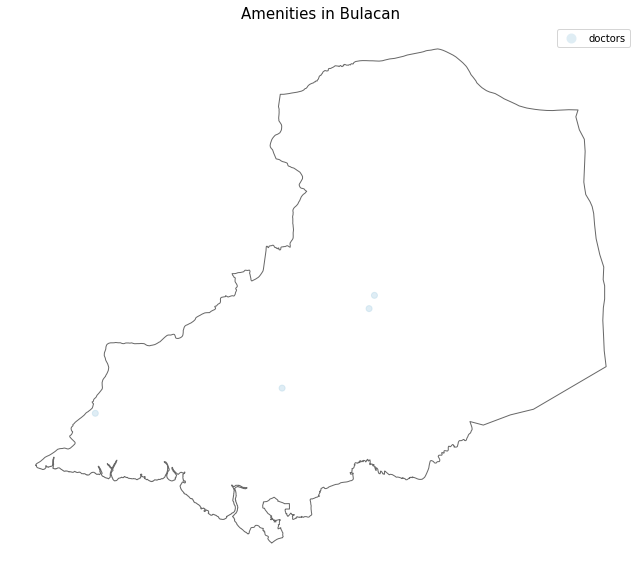

In [74]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenities.loc[bulacan_amenities["amenity"]=="doctors"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Bulacan', fontsize=15)
ax.axis('off');

In [63]:
bulacan_amenities.amenity.unique()

array(['hospital', 'pharmacy', 'dentist', 'social_facility', 'clinic',
       'doctors', ''], dtype=object)

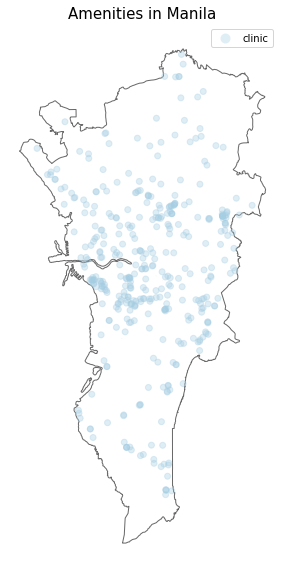

In [81]:
manila = ph[ph.NAME_1=="Metropolitan Manila"]
manila_amenities = gpd.sjoin(healthsites, manila, op='within')
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
manila.plot(ax=ax, color='white', edgecolor='dimgray')
manila_amenities.loc[manila_amenities["amenity"]=="clinic"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Manila', fontsize=15)
ax.axis('off');

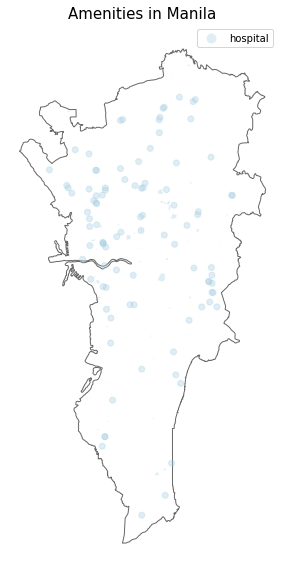

In [62]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
manila.plot(ax=ax, color='white', edgecolor='dimgray')
manila_amenities.loc[manila_amenities["amenity"]=="hospital"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Manila', fontsize=15)
ax.axis('off');

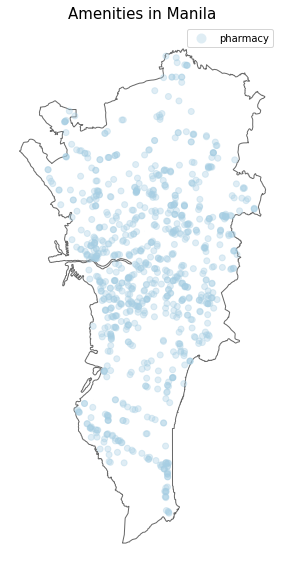

In [82]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
manila.plot(ax=ax, color='white', edgecolor='dimgray')
manila_amenities.loc[manila_amenities["amenity"]=="pharmacy"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Manila', fontsize=15)
ax.axis('off');

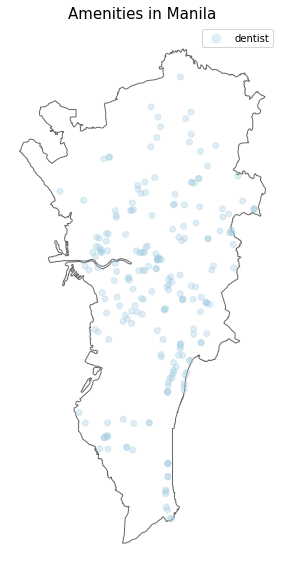

In [83]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
manila.plot(ax=ax, color='white', edgecolor='dimgray')
manila_amenities.loc[manila_amenities["amenity"]=="dentist"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Manila', fontsize=15)
ax.axis('off');

C:\Users\Jonat\anaconda3\lib\site-packages\geopandas\plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


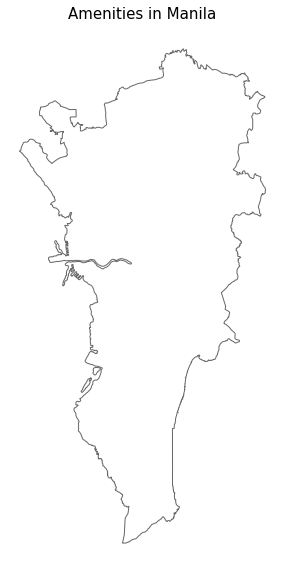

In [66]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
manila.plot(ax=ax, color='white', edgecolor='dimgray')
manila_amenities.loc[manila_amenities["amenity"]=="social_facility"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Manila', fontsize=15)
ax.axis('off');

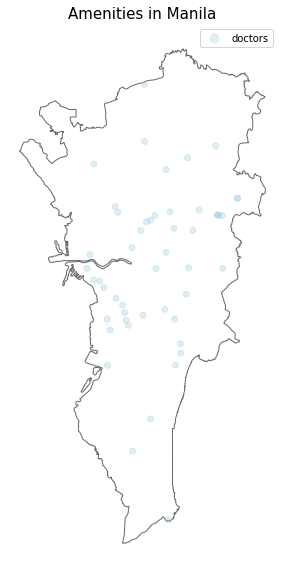

In [67]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
manila.plot(ax=ax, color='white', edgecolor='dimgray')
manila_amenities.loc[manila_amenities["amenity"]=="doctors"].plot(ax=ax, categorical=True, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Amenities in Manila', fontsize=15)
ax.axis('off');